# Peformance

This notebook shows the training and test performance obtain across different experiments

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
exp_name = "gru_004"

pathfile = os.path.join(exp_name,"metrics","version_0","metrics.csv")
df = pd.read_csv(pathfile)

In [4]:
# Create a copy of the DataFrame
df_clean = df.copy()

# For rows with validation metrics, fill in the training loss from the other row of the same epoch
for epoch in df_clean[df_clean['val_auc'].notna()]['epoch'].unique():
    # Get the training loss for this epoch
    train_loss = df_clean[(df_clean['epoch'] == epoch) & (df_clean['train_loss'].notna())]['train_loss'].iloc[0]
    # Update the row with validation metrics
    df_clean.loc[(df_clean['epoch'] == epoch) & (df_clean['val_auc'].notna()), 'train_loss'] = train_loss

# Remove duplicate epochs, keeping the row with validation metrics
df_clean = df_clean.sort_values('val_auc', na_position='first').drop_duplicates(subset=['epoch'], keep='last')

# Sort by epoch
df_clean = df_clean.sort_values('epoch')

In [10]:
df_valid_metrics = df_clean.loc[df_clean['val_auc'].notna()]
df_valid_metrics.head(2)

,epoch,step,train_loss,val_auc,val_f1,val_loss,val_map
9,9,2829,0.052507,0.333395,0.006855,0.050764,0.074003
20,19,5659,0.051386,0.344988,0.008786,0.049779,0.086606


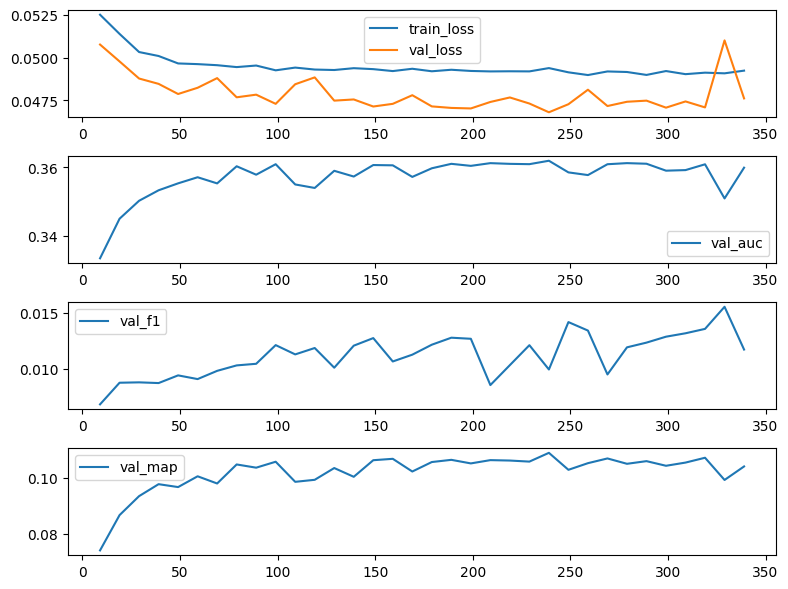

In [12]:
plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["train_loss"], label="train_loss")
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["val_loss"], label="val_loss")
plt.legend()
plt.subplot(412)
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["val_auc"], label="val_auc")
plt.legend()
plt.subplot(413)
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["val_f1"], label="val_f1")
plt.legend()
plt.subplot(414)
plt.plot(df_valid_metrics["epoch"], df_valid_metrics["val_map"], label="val_map")
plt.legend()

plt.tight_layout() 

